In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [5]:
read_file = pd.read_csv('/home/srujan/Downloads/world-development-indicators/Indicators.csv')

In [19]:
read_file.head(15)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [20]:
country = read_file['CountryName'].str.contains('India')
indicator = read_file['IndicatorName'].str.contains('CO2 emissions ')
#read_file[country].head()
display = read_file[country & indicator]
display.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11575,India,IND,CO2 emissions (kg per 2005 US$ of GDP),EN.ATM.CO2E.KD.GD,1960,1.174578
11576,India,IND,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,120581.961000
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
11578,India,IND,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,0.000000
11579,India,IND,CO2 emissions from gaseous fuel consumption (kt),EN.ATM.CO2E.GF.KT,1960,0.000000


In [29]:
years = display['Year'].values

In [30]:
co2_values = display['Value'].values

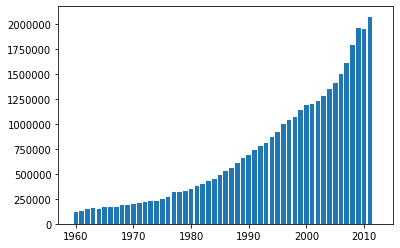

In [31]:
plt.bar(years, co2_values)
plt.show()